### 如果我们把平方损失函数改成绝对损失函数

$$loss=\frac{1}{n}\sum{|y_i - \hat y|}=\frac{1}{n}\sum\sqrt{(y_i - \hat y)^{2}} =\frac{1}{n}\sum\sqrt{(y_i - (kx_i+b))^{2}}$$
				
					

$$
\frac{\partial l o s s}{\partial k}=\frac{1}{n} \sum \frac{\left(y_{i}-\left(k x_{i}+b\right)\right) * (-x_{i})}{\sqrt{\left(y_{i}-\left(k x_{i}+b\right)\right)^{2}}}=\frac{1}{n} \sum \frac{\left(y_{i}-\hat{y}\right) * (-x_{i})}{\left|y_{i}-\hat{y}\right|}
$$

$$
\frac{\partial l o s s}{\partial b}=\frac{1}{n} \sum \frac{y_{i}-\left(k x_{i}+b\right)*(-1)}{\sqrt{\left(y_{i}-\left(k x_{i}+b\right)\right)^{2}}}=\frac{1}{n} \sum \frac{y_{i}-\hat{y}*(-1)}{\left|y_{i}-\hat{y}\right|}
$$

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline

data = load_boston()
X,y = data['data'],data['target']
X_rm = X[:,5]

def price(x,k,b):
    return x*k + b

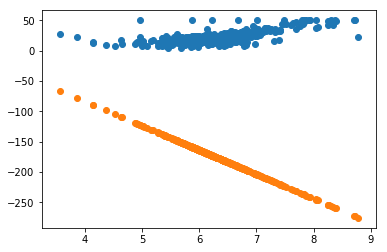

In [2]:
k = random.randint(-100,100)
b = random.randint(-100,100)
price_by_random = [price(r,k,b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_by_random)

In [9]:
def loss(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i,y_hat_i in zip(list(y),list(y_hat))) / len(y)

def partial_k(x,y,y_hat):
    n = len(y)
    gradient = 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i - y_hat_i) * (-x_i) / abs(y_i - y_hat_i)
    return gradient

def partial_b(x,y,y_hat):
    n = len(y)
    gradient = 0
    for y_i,y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i - y_hat_i)*(-1)/ abs(y_i - y_hat_i)
    return gradient

In [19]:
trying_times = 50000
k = random.random() * 200 - 100
b = random.random() * 200 - 100
min_loss = float('inf')
alpha = 0.0001

for i in range(trying_times):
    price_by_random = [price(x,k,b) for x in X_rm]
    current_loss = loss(y,price_by_random)
    if current_loss < min_loss:
        min_loss = current_loss
    if i % 2000 ==0:
        print('Round: {}, k: {}, b: {}, loss: {}'.format(i,k,b,current_loss))
            
    gradient_k = partial_k(X_rm,y,price_by_random)
    gradient_b = partial_b(X_rm,y,price_by_random)
    k = k - gradient_k*alpha
    b = b - gradient_b*alpha

Round: 0, k: 71.88997363841423, b: 41.27630700898513, loss: 470.54570111866553
Round: 2000, k: -0.4355669615858132, b: 24.305707008984406, loss: 6.697940846830145
Round: 4000, k: 0.47741643841419523, b: 18.658907008983356, loss: 6.374416003718528
Round: 6000, k: 1.3437116384141705, b: 13.272507008982931, loss: 6.080255717917694
Round: 8000, k: 2.1923124384141652, b: 8.0689070089838, loss: 5.8055011735062765
Round: 10000, k: 2.9777956384142104, b: 3.2563070089839674, loss: 5.570315783359447
Round: 12000, k: 3.7237910384141863, b: -1.2988929910160953, loss: 5.35974940833108
Round: 14000, k: 4.396481838414008, b: -5.437092991015998, loss: 5.185842811613969
Round: 16000, k: 5.013007638413956, b: -9.194092991015646, loss: 5.042413733800504
Round: 18000, k: 5.570993438413978, b: -12.626492991014977, loss: 4.922851463618611
Round: 20000, k: 6.071632038414027, b: -15.700292991014981, loss: 4.8269829020741755
Round: 22000, k: 6.5196302384142, b: -18.510692991015535, loss: 4.746751021444716
Roun